# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
# importing libraries neccessary for the manipulation of the data
import numpy as np
import pandas as pd

# importing libraries neccessary for data the visualisation of the data
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries neccessary for scaling / normalising the data using z-scores
from sklearn.preprocessing import StandardScaler

# importing libraries neccessary to conduct the shapiro-Wilk test
from scipy.stats import shapiro

# importing libraries neccessary for splitting thet dataset
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#To check the assumption of multicollinearity by computing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing libraries neccessary to build, tune, and evaluate the machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error #RMSE
from sklearn.metrics import mean_absolute_error #MAE

#Importing the libraries neccessary for the cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Importing the libraries neccessary for checking the assumptions
from scipy import stats
import statsmodels.stats.diagnostic as diag


### Loading the dataset

In [ ]:
#Loading the dataset on my computer after having downloaded it from the Great Learning portal.
#Clicking the choose files option below and selectign teh correct document to do so.
from google.colab import files
uploaded = files.upload()


Saving Boston.csv to Boston.csv


## Data Overview

In [ ]:
# Reading the data
df = pd.read_csv('Boston.csv')

# Checking the first five rows, to ensure that the data was loaded as intended
df.head()

# Using a fucntion that allows to determine the number of rows and columns for the dataset
num_rows, num_columns = df.shape

# Printing the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Use info() to print a concise summary of the DataFrame
df.info()

#Checking whether there are any null values
null_values = df.isnull().sum()

print(null_values)

# In each column of the datafeame, checking the number of unique values
df.nunique()

Number of rows: 506
Number of columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

In [ ]:
#Computing the summary statistics of the dataset using the describe() function from pandas

summary_statistics = df.describe()

# Print the summary statistics
print(summary_statistics)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

####Findings from the above data overview suggest that:
- This confirms that the data were loaded as I intended it to.
- There are 13 variables (number of columns) for each data point, which coincides with the information given on the Great Leanring platform.
- There are 506 rows, suggesting that the dataset contains information for 506 different houses.
- The data type for all variables included in this dataset is numeric, with CHAS, RAD and TAX saved as a series of integers, and the rest recognised as a series of numbers with decimal places.
- There are no null values in this dataset, meaning that no values have to be imputed.
- Besides the CHAS column, which from the data dictionary we know is a dummy-coded categorical variable, no other variable has less than or equal to two unique values, suggesting that each of the columns contains vairance that could potnetially add to our analysis.
- The summary statistics of each column suggest that some clumns have a proportionally high variance of the distribution, highlighted by the high standard deviation of this column.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

### **EDA - Q1. What does the distribution of 'MEDV' look like**?
MEDV = Median value of owner-occupied homes in 1000 dollars


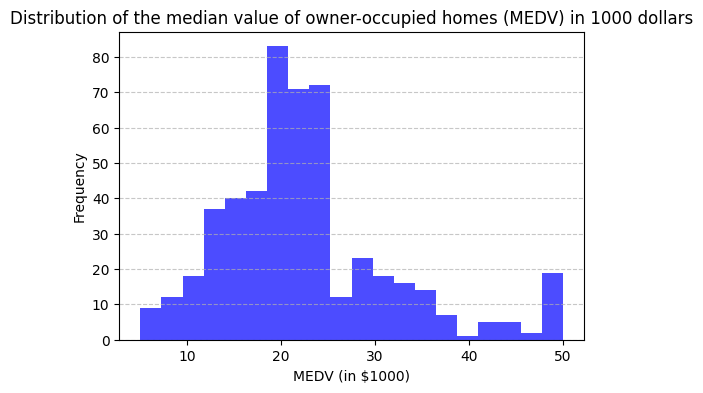

In [ ]:
# From applying the df.head() function above, I know that my variable is continuous. Therefore, I will visualise it using both a histogram and a boxplot

##Creating the relevant histogram
medv_values = df['MEDV']

# Create a histogram to visualize the distribution
plt.figure(figsize=(6, 4))
plt.hist(medv_values, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of the median value of owner-occupied homes (MEDV) in 1000 dollars')
plt.xlabel('MEDV (in $1000)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#This suggests that the distribution of the data is left skewed. In particular, one bin on the right side of the x-axis is unexpectedly high

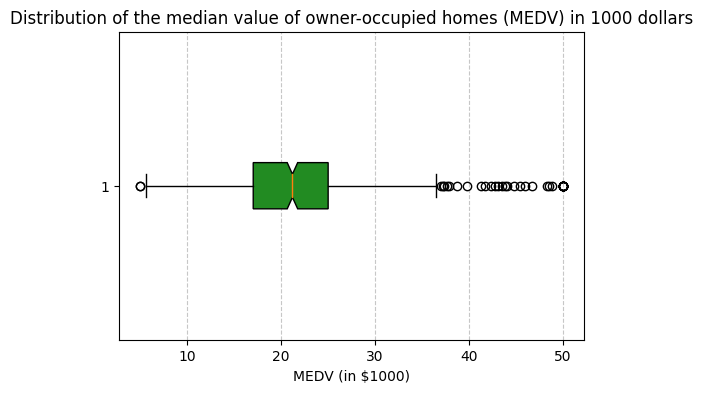

The 'MEDV' variable is not normally distributed (p-value < 0.05).


In [ ]:
##Creating the relevant boxplot

plt.figure(figsize=(6, 4))
plt.boxplot(medv_values, vert=False, notch=True, patch_artist=True, boxprops=dict(facecolor='forestgreen'))
plt.title('Distribution of the median value of owner-occupied homes (MEDV) in 1000 dollars')
plt.xlabel('MEDV (in $1000)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#Based on this observation, I am performing the Shapiro-Wilk test, to assess whether the assumption of normality really is violated for this variable.

_, p_value = shapiro(df['MEDV'])

if p_value < 0.05:
    print("The 'MEDV' variable is not normally distributed (p-value < 0.05).")
else:
    print("The 'MEDV' variable appears to be normally distributed (p-value >= 0.05).")


####Findings for EDA - Q1 suggest that:
- The distribution of the MEDV variable appears to have a left-skewed distribution.
- This is illustrated in the histogram of values, where there is an unexpectedly high bin on the right end of the x-axis.
- It is further confirmed by the high number of outliers shown towards the right end of the x-axis on the boxplot.
- If this is not corected, this would violate the assumption of normality in the followign regression analyses.
- This violation of this assumption was further confirmed by the fact that the p-value of the Shapiro-Wilk test was above .05.
> One of the approaches that can be used to ensure that this assumption is not violated in following analyses is to do a logrithmic transformation of this variable.


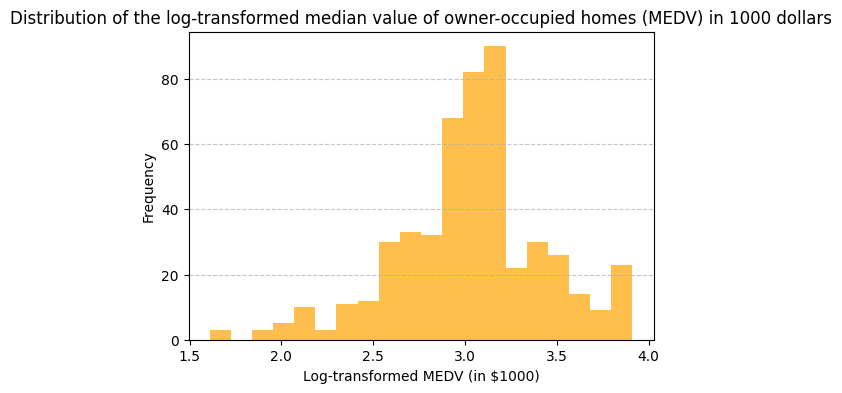

In [ ]:
#Computing a logarithmic transformation of the MEDV variable to correct for the fact that it violates the assumption of normality.
df['log_MEDV'] = np.log(df['MEDV'])

#Checking whether the corerction had the intended impact, and whether it increased the normality of the shape of this variable's distribution.
#Doing this by creating a historgram. This allows me to visually assess the distributiob and visually compare it to the non-transformed plot above.

log_medv_values = df['log_MEDV']

plt.figure(figsize=(6, 4))
plt.hist(log_medv_values, bins=20, color='orange', alpha=0.7)
plt.title('Distribution of the log-transformed median value of owner-occupied homes (MEDV) in 1000 dollars')
plt.xlabel('Log-transformed MEDV (in $1000)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

####Correction of the violation of the assumption of normality for the MEDV variable:

- After applying the logarithmic transformation to the MEDV variable, the normality of its distribution appears to have significantly increased. This is particularly evidenced by the bin on the far right of the x-axis, which is now proportionally much less pronounced compared to the rest of the distribution.
- It appears that the log-transformation was able to reduce the impact of the outliers that were observed in the boxplot.

###**EDA - Q2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?**


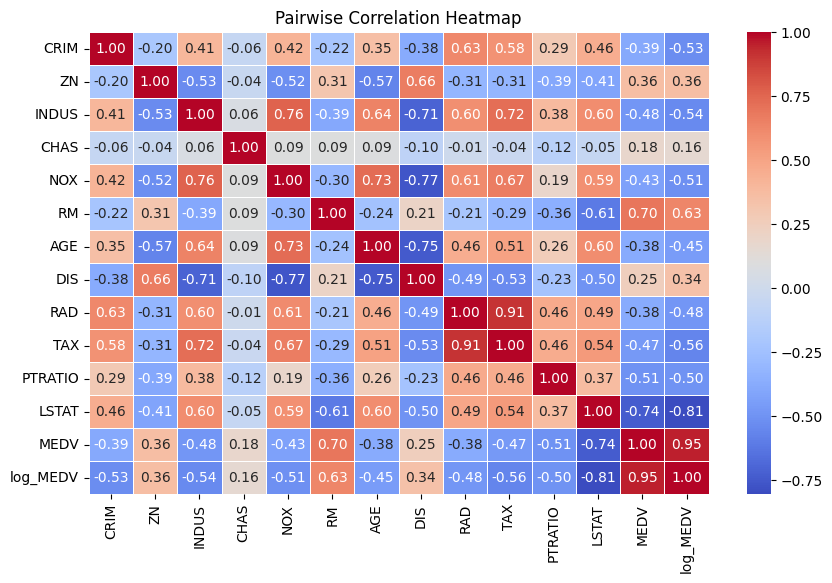

In [ ]:
##MEDV is the dependent variable because it is the one we ultimately want to predict with the model.
## Therefore, when interpreting the heatmap, I will pay particular attention to the magnitude of the correlation between
## Therfore, through the correlation heatmap between MEDV and each of the other variables respectively,
## I will be able to see whether they might be relevant to the outcome of the model that I am trying to predict.

# Computing a correlation matrix for all variables present in my dataframe
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()

# Creating a heatmap to visualise this correlation matrix
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()


####Findings for EDA - Q2 suggest that:
> Based on a visual assessment of the above correlation matrix, I will further analyse the magnitude of the associations of the variables that have correlations above the magnitude of .70 as this is the threshold used to determine strong-to-very-strong correlations.
> When doing this, I am not looking at the MEDV variable as it was violating an assumption, but rather the log_MEDV variable.
These correlations are:
1. LSTAT & log_MEDV
2. INDUS & DIS
3. INDUS & TAX
4. INDUS & NOX
5. AGE & NOX
6. DIS & NOX
7. DIS & AGE
8. RAD & TAX

###**EDA - Q3. What are all the inferences that can be found by doing univariate analysis for different variables?**


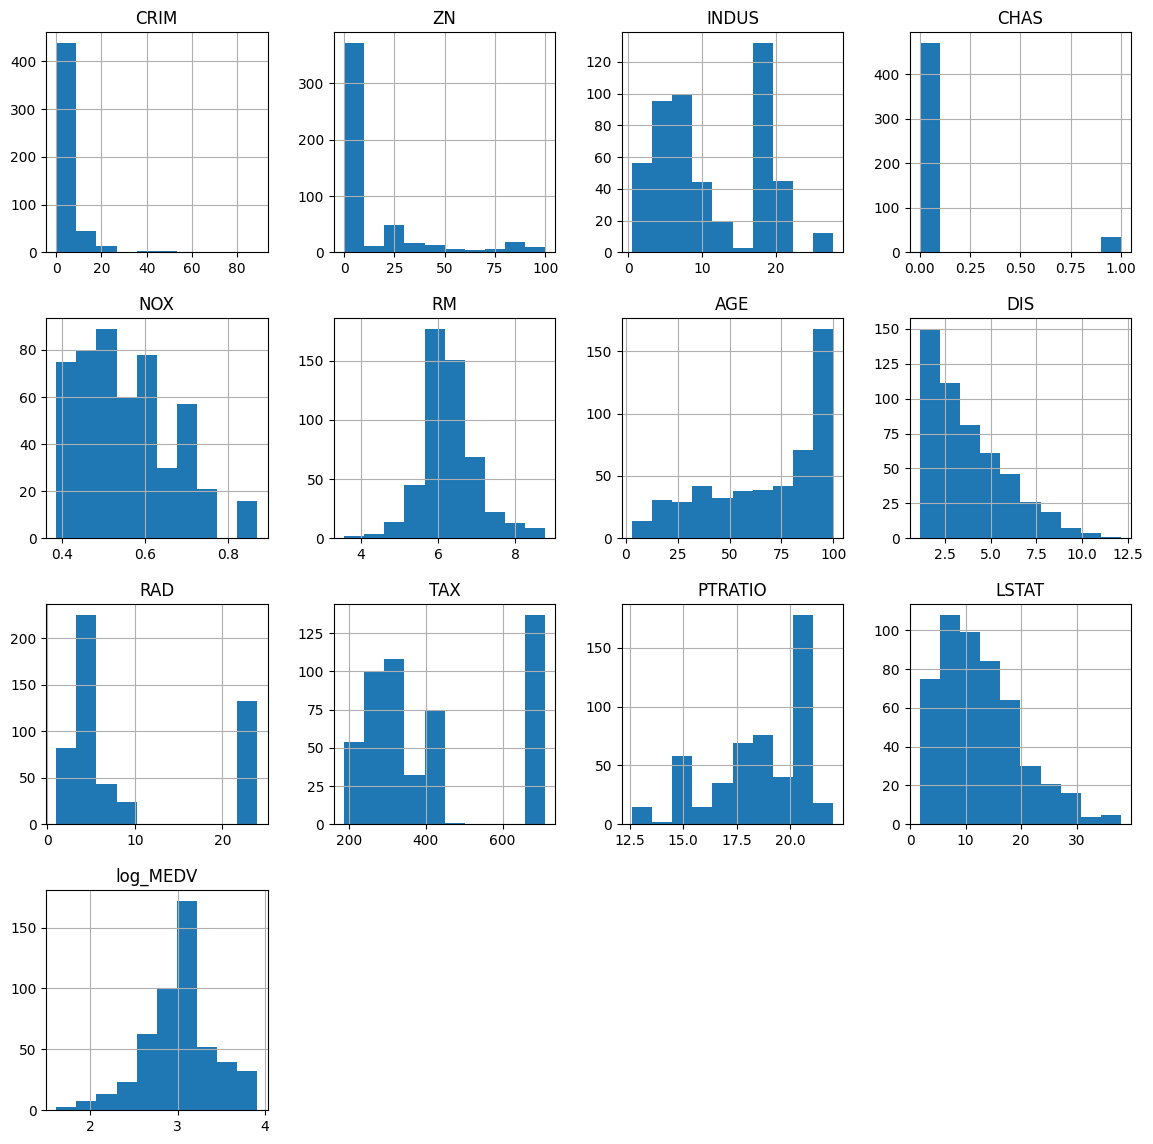

In [ ]:

# Combining all the columns so that I can then create a grid with histograms showing the distribution of all the variables in the dataset.
# This allows me to get an overview of the data distribution.
all_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
          'DIS', 'RAD', 'TAX','PTRATIO', 'LSTAT', 'log_MEDV']

# Ploting and printing the aforementioned series of histograms
df[all_cols].hist(figsize = (14, 14))

#Printing the histograms
plt.show()

####Interpretation:
- *CRIM*: Right skewed, most towns appear to have a low per capita crime rate.
- *ZN*: Most houses appear to be in towns where there is a low proportion of residential land zones for lots over 25,000 sq.ft.
- *INDUS*: Data unevenly distributed for this variable.
- *CHAS*: Dichotomous dummy-coded variable, with a much higher proportion of houses that are not close to the Charles river.
- *NOX*: Overall, the concentration of nitric oxide is relatively high, the distribution is slightly right-skewed.
- *RM*: Appears to have a normal distribution, with the mode number of rooms per dwelling being 6. have a high proportion of owner-occupied units built before 1940.
- *DIS*: The weighted distances to five Boston employment centers appear to have a right skewed distribution with the height of bins evenly decreasing as the distance increases.
- *RAD*: Index of accessibility to radial highways appears to be importantly skewed. This is something that should be kept in mind / corrected for if the variable is included in further analyses.
- *TAX*: This distribution is not normal and appears to be heavily skewed by the bin on the right of the x-axis. This is something to pay attention to in furhter analyses, a data-transformation might be neccessary.
- *PTRATIO*: Overall relatively uneven distribution, with a high proportion of towns that have a high ration between pupils and teachers.
- *LSTAT*: Distribution is right-skewed, meaning that overall there is a higher proportion of the population that is considerd to have a lower status.
- *log_MEDV*: This has a relatively normal distribution, which is expexted, given that the values have been log-transformed.

###**EDA - Q4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

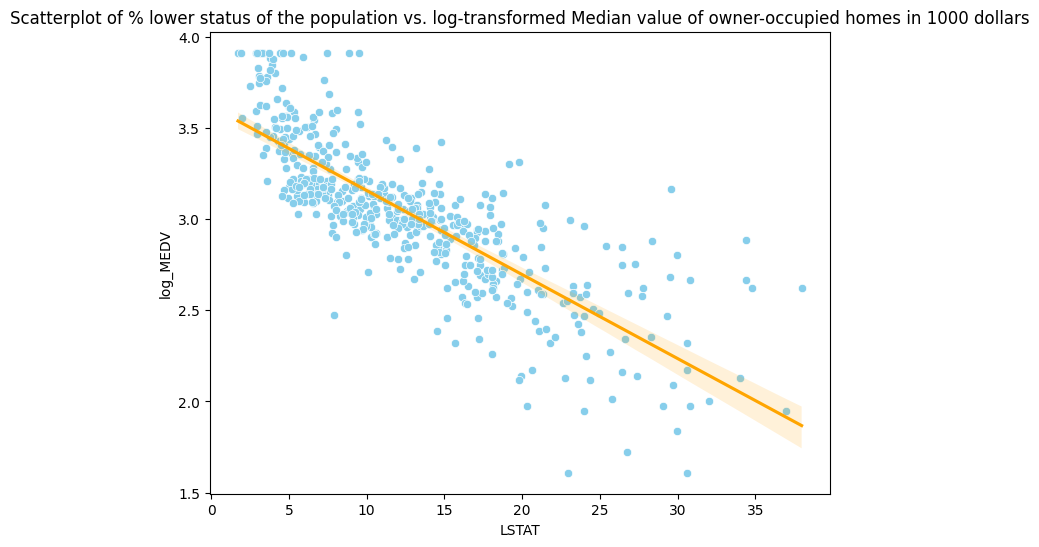

In [ ]:
#Computing a scatterplot to visualise the distribution between the variables (1) LSTAT & log_MEDV
## Checked that by default, the sns.regplot() function that I am using below includes 95% confidence intervals to its line of best fit.

#Creating a new pandaseries / object for the relevant variables respecitvely, so that I can use them independently from the original dataframe
LSTAT = df['LSTAT']
log_MEDV = df['log_MEDV']

# Creating a scatterplot to visualise the above variables, including a line of best fit.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=LSTAT, y=log_MEDV, color='skyblue')

# Adding a line of best fit with 95% CIs
sns.regplot(x=LSTAT, y=log_MEDV, color='orange', scatter=False, label='Line of Best Fit')

# Defining the lables of the axes as well as the title of the plot to allow for better readability
plt.xlabel('LSTAT')
plt.ylabel('log_MEDV')
plt.title('Scatterplot of % lower status of the population vs. log-transformed Median value of owner-occupied homes in 1000 dollars')


# Show the plot
plt.show()

####Interpretation:
- The distribution on this scatterplot suggests that when the median value of the owner-occupied homes is high, this is associated with a lower percentage of peolpe who have a lower status.
- The witdh of the 95% confidence interval reflects that most homes in this dataset are associated with areas where people do not have a lower status, and where the median value of each home is high. The increasing width of the CI suggests increaing variance among the median value of owner occupied homes as the percentage of lower status of the population increases.

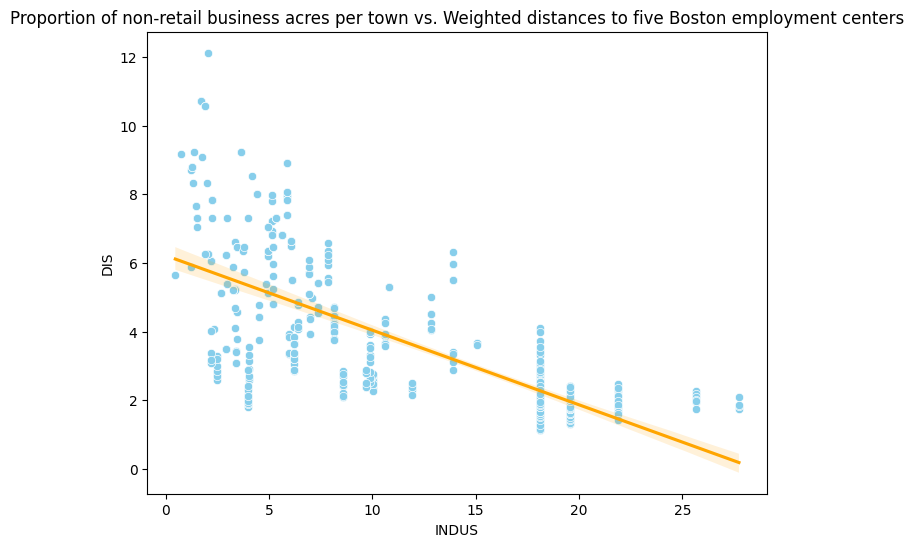

In [ ]:
#Computing a scatterplot to visualise the distribution between the variables (2) INDUS & DIS

#Creating a new pandaseries / object for the relevant variables respecitvely, so that I can use them independently from the original dataframe
INDUS = df['INDUS']
DIS = df['DIS']

# Creating a scatterplot to visualise the above variables, including a line of best fit.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=INDUS, y=DIS, color='skyblue')

# Adding a line of best fit with 95% CIs
sns.regplot(x=INDUS, y=DIS, color='orange', scatter=False, label='Line of Best Fit')

# Defining the lables of the axes as well as the title of the plot to allow for better readability
plt.xlabel('INDUS')
plt.ylabel('DIS')
plt.title('Proportion of non-retail business acres per town vs. Weighted distances to five Boston employment centers')


# Show the plot
plt.show()

####Interpretation:
- The proportion of non-retail buisness acres per town appears to take specific values as it increases. This might be due to regulations in specific towns about the proportion of non-buisness acres allowed.
- As the proportion of non-business acres per town decreases, the weighted distance to five boston emplotment centres decreases as well.
- This appears to make sense because a high proportion of non-buisness retain acres may mean more residential areas, which is where the boston employment centres would be likely to be located.
- The correlation between those two variables does not appear to be overly influenced by outliers.  


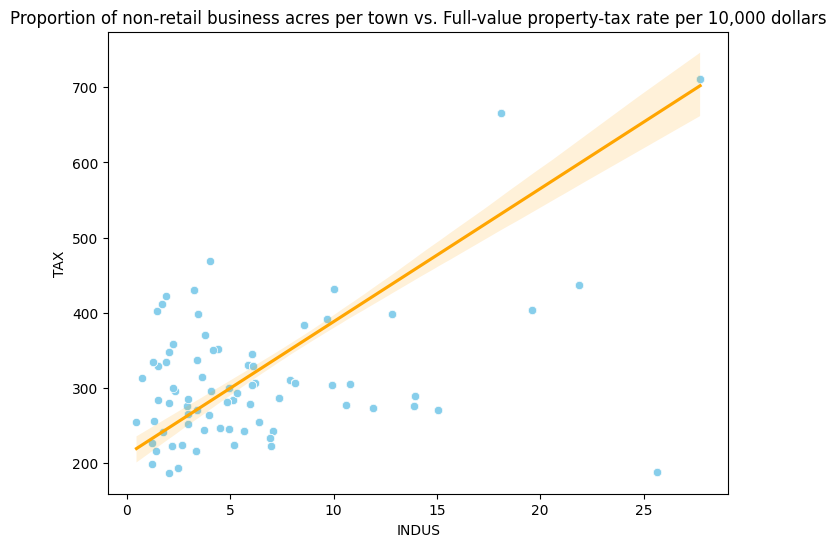

In [ ]:
#Computing a scatterplot to visualise the distribution between the variables (3) INDUS & TAX

#Creating a new pandaseries / object for the relevant variables respecitvely, so that I can use them independently from the original dataframe
INDUS = df['INDUS']
TAX = df['TAX']

# Creating a scatterplot to visualise the above variables, including a line of best fit.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=INDUS, y=TAX, color='skyblue')

# Adding a line of best fit with 95% CIs
sns.regplot(x=INDUS, y=TAX, color='orange', scatter=False, label='Line of Best Fit')

# Defining the lables of the axes as well as the title of the plot to allow for better readability
plt.xlabel('INDUS')
plt.ylabel('TAX')
plt.title('Proportion of non-retail business acres per town vs. Full-value property-tax rate per 10,000 dollars')


# Show the plot
plt.show()

#### Interpretation:
- While the correlation between these two variables is very high, this estimate appears to be skewed by two outliers that can be seen in the top left corner of the above figure.
- This anomaly in the spread of the data is reflected in the reduced density of  the datapoints where there are high values for taxes.
> This suggests that these two values should be removed, which I will do below by excluding datapoints with a tax value above 500.

In [ ]:
# Filtering the DataFrame to remove rows where "TAX" is above 500
###It is important to remember that following this exclusion, future analyses should use the dataframe named df_filtered
df_filtered = df[df['TAX'] <= 500]

#Checking that this was implemented as intended by computing the maximum value of the TAX value in the new dataframe
max_tax = df_filtered['TAX'].max()
print("Maximum tax value in df_filtered:", max_tax)

#The result below shows that this is below 500, suggesting that the change was implemented as intended.

#Computing the correlation between the two variables after removing the outliers to see if it is still above |.70|, and therefore relevant to our future analyses.
correlation = df_filtered['INDUS'].corr(df_filtered['TAX'])

# Printing the new correlation coefficient
print("The correlation between 'INDUS' and 'TAX', after removing the tax outliers is:", correlation)



Maximum tax value in df_filtered: 469
The correlation between 'INDUS' and 'TAX', after removing the tax outliers is: 0.4155020562916524


####Interpretation:
- After removing the two outliers depicted in the above scatterplot, the correlation between the INDUS and TAX variables becomes .42.
- This makes it below the defined threshold of .70, meaning that it will be excluded from further consideration and analyses.

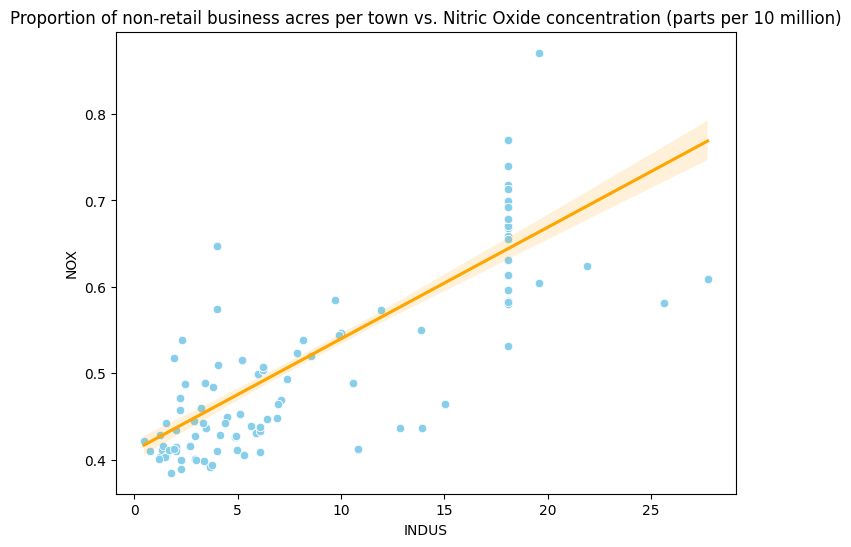

In [ ]:
#Computing a scatterplot to visualise the distribution between the variables (4) INDUS & NOX

#Creating a new pandaseries / object for the relevant variables respecitvely, so that I can use them independently from the original dataframe
INDUS = df['INDUS']
NOX = df['NOX']

# Creating a scatterplot to visualise the above variables, including a line of best fit.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=INDUS, y=NOX, color='skyblue')

# Adding a line of best fit with 95% CIs
sns.regplot(x=INDUS, y=NOX, color='orange', scatter=False, label='Line of Best Fit')

# Defining the lables of the axes as well as the title of the plot to allow for better readability
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.title('Proportion of non-retail business acres per town vs. Nitric Oxide concentration (parts per 10 million)')


# Printing the plot
plt.show()

####Interpretation:
- The above correlation suggests that areas where there is a low proportion of non-retail buisness acres per town is associated with a low concentration of nitric oxide.
- While again the density of the data distribution decreases as both of the above variables increase, there appears to be no outliers that may overly bias the correlation of the association between the two variables.


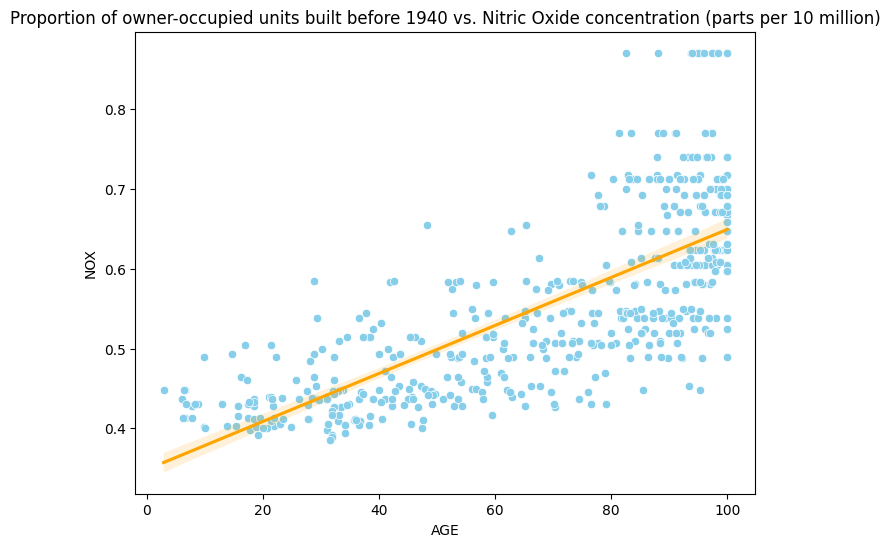

In [ ]:
#Computing a scatterplot to visualise the distribution between the variables (5) AGE & NOX

#Creating a new pandaseries / object for the relevant variables respecitvely, so that I can use them independently from the original dataframe
AGE = df['AGE']
NOX = df['NOX']

# Creating a scatterplot to visualise the above variables, including a line of best fit.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=AGE, y=NOX, color='skyblue')

# Adding a line of best fit with 95% CIs
sns.regplot(x=AGE, y=NOX, color='orange', scatter=False, label='Line of Best Fit')

# Defining the lables of the axes as well as the title of the plot to allow for better readability
plt.xlabel('AGE')
plt.ylabel('NOX')
plt.title('Proportion of owner-occupied units built before 1940 vs. Nitric Oxide concentration (parts per 10 million)')


# Printing the plot
plt.show()

####Interpretation:
- The above scatterplot suggests that as the proportion of older owner-occupied units (built before 1940) increases, the concentration of nitric oxide increases as well.
- There appears to be a ceiling effect for some of the datapoints, which might reflect that there was a higher cocentration of nitric oxide in some areas than the used measurement tool was able to assess. It suggests a systematic limitation to the measurement of the NOX variable, implying that the correlation that has been found as part of these analyses might be an underestimation. While this should not be corrected with data transformations, it needs to be considered in the interpretation of future results.

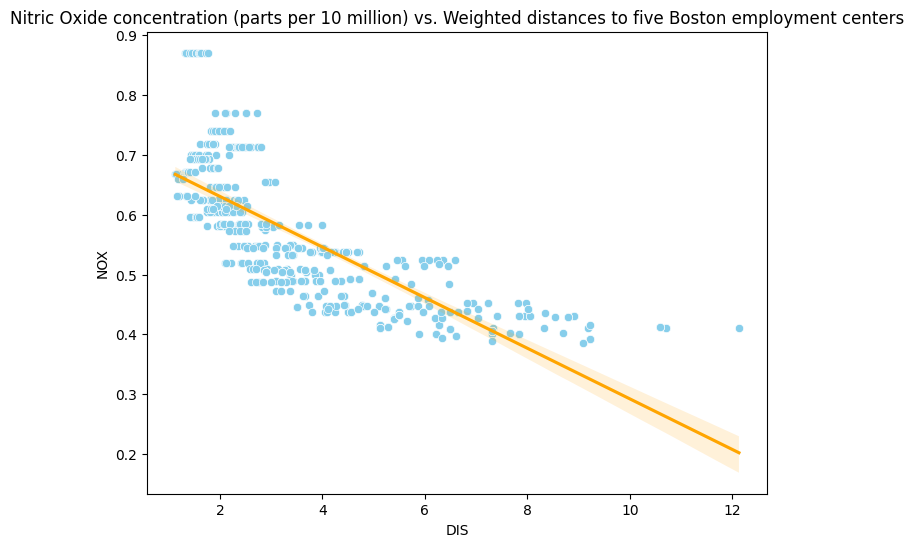

In [ ]:
#Computing a scatterplot to visualise the distribution between the variables (6) DIS & NOX

#Creating a new pandaseries / object for the relevant variables respecitvely, so that I can use them independently from the original dataframe
DIS = df['DIS']
NOX = df['NOX']

# Creating a scatterplot to visualise the above variables, including a line of best fit.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=DIS, y=NOX, color='skyblue')

# Adding a line of best fit with 95% CIs
sns.regplot(x=DIS, y=NOX, color='orange', scatter=False, label='Line of Best Fit')

# Defining the lables of the axes as well as the title of the plot to allow for better readability
plt.xlabel('DIS')
plt.ylabel('NOX')
plt.title('Nitric Oxide concentration (parts per 10 million) vs. Weighted distances to five Boston employment centers')


# Printing the plot
plt.show()

####Interpretation:
- The above data distribution indicates that as the concentration of nitric oxide decreases, the weighted distance to the five employment centres in Boston increases.

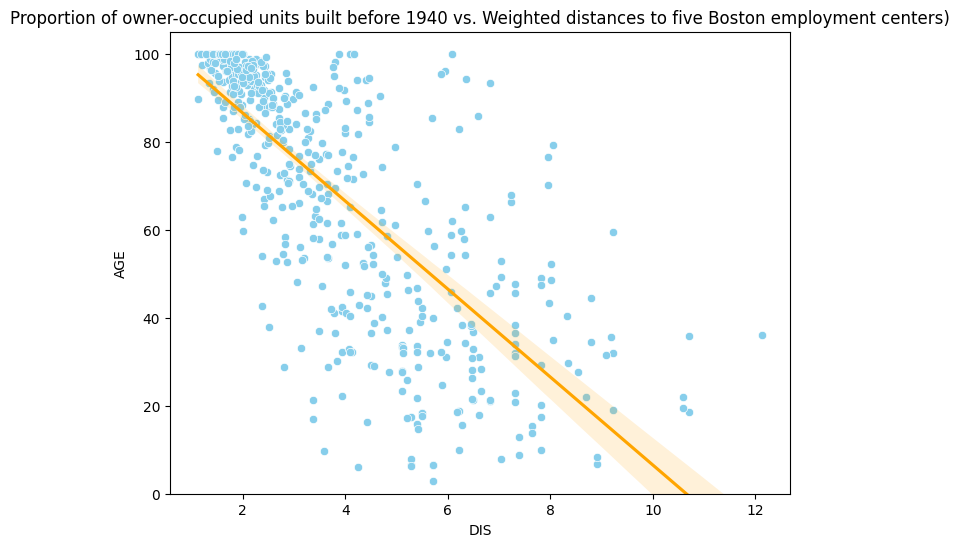

In [ ]:
#Computing a scatterplot to visualise the distribution between the variables (7) DIS & AGE

#Creating a new pandaseries / object for the relevant variables respecitvely, so that I can use them independently from the original dataframe
DIS = df['DIS']
AGE = df['AGE']

# Creating a scatterplot to visualise the above variables, including a line of best fit.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=DIS, y=AGE, color='skyblue')

# Adding a line of best fit with 95% CIs
sns.regplot(x=DIS, y=AGE, color='orange', scatter=False, label='Line of Best Fit')

# Defining the lables of the axes as well as the title of the plot to allow for better readability
plt.xlabel('DIS')
plt.ylabel('AGE')
plt.title('Proportion of owner-occupied units built before 1940 vs. Weighted distances to five Boston employment centers)')

# Setting the y-axis limits to be between 0 and 100, to make sure the axis fits the max and min of the data
plt.ylim(0, 105)

# Printing the plot
plt.show()

####Interpretation:
- There appear to be no outliers skewing the obtained results in the above plot.
- The observed distribution suggests that when an area has a high proportion of older owner-occupied buildings, these are often associated with a smaller weighted distance to the five boston employment centres.

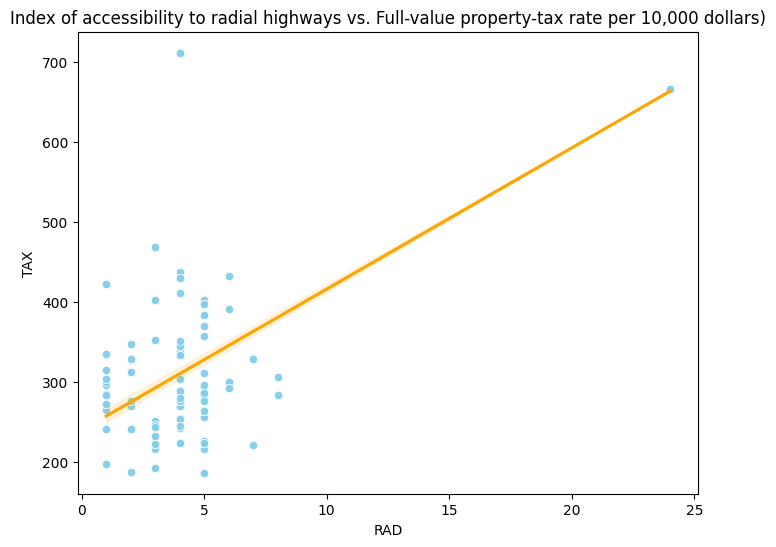

In [ ]:
#Computing a scatterplot to visualise the distribution between the variables (7) RAD & TAX

#Creating a new pandaseries / object for the relevant variables respecitvely, so that I can use them independently from the original dataframe
RAD = df['RAD']
AGE = df['TAX']

# Creating a scatterplot to visualise the above variables, including a line of best fit.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=RAD, y=TAX, color='skyblue')

# Adding a line of best fit with 95% CIs
sns.regplot(x=RAD, y=TAX, color='orange', scatter=False, label='Line of Best Fit')

# Defining the lables of the axes as well as the title of the plot to allow for better readability
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.title('Index of accessibility to radial highways vs. Full-value property-tax rate per 10,000 dollars)')

# Printing the plot
plt.show()

####Interpretation:
- Following the same pattern as the previously analysed correlation including the TAX variable, there appear to be two outliers that are biasing the high correlation observed in the association between those two variables.
> As a result, I will remove these two outliers and see whether the correlation between the two variables remains above |.70| afterwards.

In [ ]:
# Filtering the DataFrame to remove rows where "TAX" is above 500
###As stated above, it is important to remember that following this exclusion, future analyses should use the dataframe named df_filtered
df_filtered = df[df['TAX'] <= 500]

#Checking that this was implemented as intended by computing the maximum value of the TAX value in the new dataframe
max_tax = df_filtered['TAX'].max()
print("Maximum tax value in df_filtered:", max_tax)

#The result below shows that this is below 500, suggesting that the change was implemented as intended.

#Computing the correlation between the two variables after removing the outliers to see if it is still above |.70|, and therefore relevant to our future analyses.
correlation = df_filtered['RAD'].corr(df_filtered['TAX'])

# Printing the new correlation coefficient
print("The correlation between 'RAD' and 'TAX', after removing the tax outliers is:", correlation)



Maximum tax value in df_filtered: 469
The correlation between 'RAD' and 'TAX', after removing the tax outliers is: 0.24975731331429218


####Interpretation:
- After excluding the outliers, the correlation between the TAX and RAD variables importantly decreases in magnitude and bebomes .25, making it below the threshold of |.70|.
- Similarly to the other correlation analysed above that included the TAX variable, this suggests that this association is no longer relevant to future analyses.

## Data Preprocessing
####**This has partly been done throughout the above data overview, univariate and bivariate analyses such that it logically follows the respective insights following upon which decisions for data preprocessing were made. For the purposes of this assessment, I will summarise the steps taken below:**

*Missing value treatment*
- Inspection of the data in teh data overview section revealed that there were no missing data, and therefore no values needed to be imputed.

*Log transformation of dependent variable if skewed*
- Visualisation of the data distribution of the MEDV variable through a histogram and a boxplot suggested that outliers were leading to a violation of the assumption of normality. This was further confirmed by the results of a Shapiro-Wilk test.
- As a result, this variable was log-transformed, which normalised the data distribution. Accordingly, future analyses should use the log_MEDV variable.

*Feature engineering (if needed)*
- Feature transforamation waas carried out through the aforementioned log-transformation, the categorical variable was already dummy-encoded, no missing data was present. A correlation-based feature selection was conducted above by selecting the variables that have a correlation above teh magnitude of |.70|.

*Outlier detection and treatment (if needed)*
- Future analyses have to use the df_filtered dataframe because outliers were removed from the TAX distribution.

*Preparing data for modeling*
- This includes splitting the dataframe into a train and test set, which will be done below.

*Any other preprocessing steps (if needed)*
- It still needs to be checked whether the assumption of multicollinearity is met among the variables. This will be assessed using the Variance Inflation Factor with a cutoff value of 5.


In [ ]:
#Defining my DV and IVs

IV = df.drop(columns=['log_MEDV', 'MEDV'])
DV = df['log_MEDV']

#Here, when I use the df_filtered dataset, which has the outliers in the TAX column removed, I cannot split the data because it results in a
#different number of participants for different variables used in the model. I do not want to fully remove this variable yet as it might
#be important for teht predictive validity of the model I am building. I do not want to remove all the participants that had an outlier value for that
#column because it would reduce the power of my analyses. As a result, I am proceeding with the unfiltered TAX column, and will see how it contributes to the
#predictive validity of the model.

#Splitting the dataset to have 80% of the data in the training set, and 20% of the data in the testing set.
#This follows what we were taught to be an established rule of thumb for the ratios of splitting the data.

DV_train, DV_test, IV_train, IV_test = train_test_split(DV, IV, test_size=0.2, random_state=32)

#Adding the constant / intercept to the model
#Doing this seperately for the training and testing datasets

IV_train = sm.add_constant(IV_train)
IV_test = sm.add_constant(IV_test)

#Doing this separately for the log-transformed data
DV_train_log = np.log(DV_train)
DV_test_log = np.log(DV_test)




In [ ]:
##As announced above, using VIF to test whether the assumption of multicollinearity is met in the filtered dataframe.

#Computing a new dataframe so that the results of the VIF computations can be stored in it
vif_data = pd.DataFrame()
vif_data["Variable"] = IV_train.columns

# Computing the VIF for each IV respectively
vif_data["VIF"] = [variance_inflation_factor(IV_train.values, i) for i in range(IV_train.shape[1])]

# Printing the outpue for the above computation
print(vif_data)

   Variable         VIF
0     const  536.112159
1      CRIM    1.759083
2        ZN    2.242341
3     INDUS    4.035640
4      CHAS    1.062677
5       NOX    4.267462
6        RM    1.951942
7       AGE    3.010599
8       DIS    3.837280
9       RAD    6.941669
10      TAX    8.612324
11  PTRATIO    1.852573
12    LSTAT    2.854319


####Interpretation:
- RAD and TAX are the variables with a VIF greater than 5, suggesting that they wre violating teh assumption of multicollinearity and should therefore not be used in the regression model.
- This is not unexpected as we have seen that the TAX variable had outliers that were biasing the observed correlations.

In [ ]:
# Dropping the 'RAD' and 'TAX' columns from IV_train - following the above observations
IV_train = IV_train.drop(columns=['RAD', 'TAX'])

# Computing teh VIF again with those variables removed
vif_data = pd.DataFrame()
vif_data["Variable"] = IV_train.columns
vif_data["VIF"] = [variance_inflation_factor(IV_train.values, i) for i in range(IV_train.shape[1])]

# Printing the results
print(vif_data)


   Variable         VIF
0     const  460.760436
1      CRIM    1.390258
2        ZN    2.111496
3     INDUS    3.134773
4      CHAS    1.046356
5       NOX    3.768886
6        RM    1.901517
7       AGE    2.995244
8       DIS    3.829879
9   PTRATIO    1.540794
10    LSTAT    2.843118


####Interpretation:
- Now all of the VIF values are below 5, suggesting that we can proceed and use all of the remaining variables in our regression model.

## Model Building - Linear Regression

In [ ]:
#Using the training data defined above, I can now fit a linear regression model using ordinary least squares

# Computing the model
model = sm.OLS(DV_train_log, IV_train)

# Fitting the above model to the training data
results = model.fit()

#Printing the results to evaluate the fit of the above model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     133.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          9.89e-120
Time:                        07:22:17   Log-Likelihood:                 500.85
No. Observations:                 404   AIC:                            -979.7
Df Residuals:                     393   BIC:                            -935.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4909      0.076     19.659      0.0

####Interpretation:
- The above results indicate that the following IVs had a p-value < 0.05:
1. ZN
2. AGE
3. INDUS
- Based on the above observations, I will compute the model again whilst removing the variables that were not found to be significant predictors.

In [ ]:
##Computing a filtered model, where the variables that were found to have non-significant p-values in the previous model are removed
# Computing a list with the previously non-significant variables that are to be removed.
variables_to_exclude =  ['ZN', 'AGE', 'INDUS']

# Filtering the IV_train DataFrame to include only the variables that were found to be significant in the previous model.
IV_train_filtered = IV_train.drop(variables_to_exclude, axis=1)

# Computing a linear regresion model with the filtered training set
model_filtered = sm.OLS(DV_train_log, IV_train_filtered)

# Fit the model to the training data
results_filtered = model_filtered.fit()

# Print the summary of the filtered model
print(results_filtered.summary())


                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          7.23e-123
Time:                        07:24:23   Log-Likelihood:                 500.27
No. Observations:                 404   AIC:                            -984.5
Df Residuals:                     396   BIC:                            -952.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4919      0.076     19.749      0.0

## Model Performance Check


###**Q1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE**


In [ ]:
####For the initial, unfiltered model
#Note for interpretation of this value, lower RMSE suggests that the model has a better predictive accuracy
rmse = np.sqrt(mean_squared_error(DV_train_log, results.predict(IV_train)))

#Computing the MAE
mae = mean_absolute_error(DV_train_log, results.predict(IV_train))

#Computing the MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(DV_train_log, results.predict(IV_train))

#Printing out the results for the different model fit statistics
print("The RMSE of this model is:", rmse)
print("The MAE of this model is:", mae)
print("The MAPE of this model is:", mape)



The RMSE of this model is: 0.07004176528585274
The MAE of this model is: 0.04815011212343403
The MAPE of this model is: 4.88321734268275


####Interpretation:
- The results summary above indicates that the r-squared of the model is .772; suggesting that the model has a good for the data, as it explains a large proportion of the observed variability in the data.
- The RMSE of the model was found to be .070; suggesting relatively small prediction errors.
- The MAE of this model was found to be 0.048; further indicating small prediction errors.
- The MAPE of this model was found to be 4.88; indicating that the predictions made by the above model have a relatively small percentge error.


In [ ]:
####For the second, filtered model

#Note for interpretation of this value, lower RMSE suggests that the model has a better predictive accuracy
#Computing the RMSE using results_filtered
rmse_filtered = np.sqrt(mean_squared_error(DV_train_log, results_filtered.predict(IV_train_filtered)))

#Computing the MAE using results_filtered
mae_filtered = mean_absolute_error(DV_train_log, results_filtered.predict(IV_train_filtered))

#Computing the MAPE using results_filtered
mape_filtered = mean_absolute_percentage_error(DV_train_log, results_filtered.predict(IV_train_filtered))

#Printing out the results for the different model fit criteria
print("The RMSE of the filtered model is:", rmse_filtered)
print("The MAE of the filtered model is:", mae_filtered)
print("The MAPE of the filtered model is:", mape_filtered)



The RMSE of the filtered model is: 0.07014303419298136
The MAE of the filtered model is: 0.048226461021071976
The MAPE of the filtered model is: 4.890003524156258


####Interpretation:
- The results summary above indicates that the r-squared of the model is .773; suggesting that the model has a good for the data, as it explains a large proportion of the observed variability in the data.
- The RMSE of the model was found to be .070; suggesting relatively small prediction errors.
- The MAE of this model was found to be 0.048; further indicating small prediction errors.
- The MAPE of this model was found to be 4.89; indicating that the predictions made by the above model have a relatively small percentge error.

> Overall the fit of these models appears to be equivalent; this is because comapred to the filtered model, the initial model has a slightly lower r-squared value, but at the same time, it has slightly higher MAE and MAPE values. Different data scientists will have diverging preferences, with regards to which model should be chosen. Given however, that the differences are small in magnitude, I am deciding to carry the filtered model forward. This is because the removed variables do not appear to explain an important proportion of teh variance, suggesting that they may contribute to an overfitting of the data.

###**Q2. Is there multicollinearity? Check using VIF**


####Interpretation:
- Multicollinearity has already been assessed using the VIF above for the unfiltered model. In accordance with hte threshold of 5, some of the values were removed.
- For the filtered model, the VIF will be computed below.

In [ ]:
##As announced above, using VIF to test whether the assumption of multicollinearity is met in the filtered dataframe.

#Computing a new dataframe so that the results of the VIF computations can be stored in it
vif_data_filtered = pd.DataFrame()
vif_data_filtered["Variable"] = IV_train_filtered.columns

# Computing the VIF for each IV respectively
vif_data_filtered["VIF"] = [variance_inflation_factor(IV_train_filtered.values, i) for i in range(IV_train_filtered.shape[1])]

# Printing the outpue for the above computation
print(vif_data_filtered)



  Variable         VIF
0    const  459.325770
1     CRIM    1.351741
2     CHAS    1.042121
3      NOX    2.941849
4       RM    1.756891
5      DIS    2.514206
6  PTRATIO    1.310911
7    LSTAT    2.539190


####Interpretation:
- As for the unfiltered model, none of the VIF values exceed the magnitude of 5, suggesting that the assumption of multicollinearity is not violated among them.

###**Q3. How is the model performing after cross validation?**



In [ ]:
#First, defining the estimator that I am using, linear regression
estimator = LinearRegression()

#Computing the cross-validation, with 10 folds
scores = cross_val_score(estimator, IV_train, DV_train, cv= 10, scoring='neg_mean_squared_error')

#Printing the results such that I can analyse them
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [-0.03829791 -0.07549413 -0.03418013 -0.03035511 -0.026177   -0.0341914
 -0.04241924 -0.04415032 -0.0447515  -0.03586172]
Mean Score: -0.04058784754774433
Standard Deviation: 0.01293740664674243


####Interpretation:
- The low standard deviation (0.01) observed across the folds suggests that there is little variation between the models, suggesting consistency in its predictive validity.
- The low mean MSE value also indicates a relatively high predictive accuracy  of the model.
> Overall, this suggests that the model is still performing as well after cross validation, which helps to strengthen our understanding of its good predictive validity.

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
The assumptions to be tested are:
1. Multicollinearity - VIF (has aleready been tested above) is considered met as the variables where it was violated have been removed in this model.
2. Normality of errors - Q-Q plot, assess whether they follow a normal distribution
3. Homoscedasticity - using the Goldfeldquandt test
4. Mean of residuals - should be approximately zero

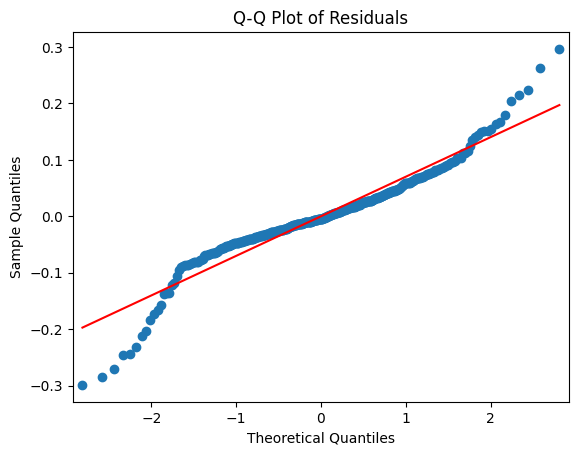

In [ ]:
#Checking assumption 2 - Normality of errors - Q-Q plot, assess whether they follow a normal distribution, for the filtered model

# Calculate residuals from the filtered model
residuals_filtered = results_filtered.resid

# Computing a Q-Q plot to visualise whether this is significantly different from a normal distribution
sm.qqplot(residuals_filtered, line='s')

# Making thsi readable by adding title and axes labels
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot of Residuals")

plt.show()

In [ ]:
#Checking assumption 3 - Homoscedasticity, using the Goldfeldquandt test , for the filtered model as this is the one to be carried forward
#Computing the residuals for the model with the filtered varialbes and squaring them
residuals_filtered = results_filtered.resid
squared_residuals = residuals_filtered ** 2

#Found on Stack Overflow that to do this for all the IVs that are in this model, I need to compute a design matrix and compute the association
#between them and the squared residuals
X_filtered = results_filtered.model.exog
model_het = sm.OLS(squared_residuals, X_filtered)
results_het = model_het.fit()

# Computing the test for heteroscedasticity
gq_test_statistic, gq_p_value, _ = diag.het_goldfeldquandt(results_het.resid, X_filtered)

alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if gq_p_value < alpha:
    print("Sig - assumption violated ")
else:
    print("Non-sig - assumption not violated")


Non-sig - assumption not violated


In [ ]:
#Checking assumption 4 - mean of residuals, for the filtered model only, as this is the one to be carried forward

# Computing the residuals
residuals_filtered = results_filtered.resid

# Calculating their mean
mean_residuals_filtered = residuals_filtered.mean()

print(mean_residuals_filtered)

#Computing a paired t-test to check whether this is significantly differenet from 0
null_hypothesis_mean = 0

t_statistic, p_value = stats.ttest_1samp(mean_residuals_filtered, null_hypothesis_mean)

alpha = 0.05

if p_value < alpha:
    print(f"sig ")
else:
    print(f"non-sig")



1.123688600913927e-15
non-sig


####Interpretation:
1. This was tested before, assumption met as none of the VIF values were found to exceed 5.
2. The Q-Q plot shows that the residuals are distributed mostly in line with the residuals, meaning that this assumption can be considered as met.
3. The Goldfeld Quant test was found to be non-significant, suggesting that the assumption is met in the filtered model.
4. Mean of residuals, this assumption appears to be met, as the mean of the residuals was not found to be significantly different from 0.
> Overall, the above analyses suggest that all the assumptions neccessary for computing a linear regression model have been met.

## Actionable Insights and Recommendations

**Significance of the techniques used and interpreted coefficients:**
> The linear regression technique used in the above analyses has several advantages.
1. It allows to assess the reltionship between the house prices, our dependent variable, and the various independent variables that were provided in the dataset.
2. It allowed to identify variables that were not as relevant to the prediciton of house prices, such as (a) the proportion of residential land zoned for lots over 25,000 sq.ft., (b) the proportion of owner-occupied units built before 1940 and (c) the proportion of non-retail business acres per town. Which were subsequently removed from the model and prevented it from overfitting.
3. As the variables were preserved, the model is interpretable, which is not the case for many other types of models. This allows us to know exactly which features are important for the predictio nof house prices in Boston.

**Actionable insights & key takeaways for the business, and various stakeholders:**
1. The developped model demonstrated good performance, with an r-squared of .773, it explains 77.3% of the observed variance. This good model performance was furhter confirmed by other indices of model fit (RMSE, MAE, and MAPE)
2. Among the features that we know about, (a) the proportion of residential land zoned for lots over 25,000 sq.ft., (b) the proportion of owner-occupied units built before 1940 and (c) the proportion of non-retail business acres per town do not importantly contribute to our ability to predict future house prices.
3. These all describe information about features of the environment in which a given house is. While this needs to be furhter investigated, it allows to hypothesise that features of the house itself, such as the number of rooms are particularly important for predicting the price of a house. Thus, a future actionable insight is to investigate how these variables differ in terms of their importance to individuals buying houses, and their willingness to spend. This may help to determine further features specific to the house at hand, rather than the environment in which it is, that help to further improve the predictive validity of the model.
4. The identification of the most important features provides valuable insight into the most important factors that affect housing prices in the Boston area. This can further be broken down by investigating the coefficients of each independent variable.
5. The developed model has practical applications for various stakeholders in the housing market. Home buyers can use the model to estimate house prices in the current market, assisting them in making informed decisions about their property purchases. Property investors can leverage the model to assess investment opportunities and understand how different factors influence property values. Housebuilders can gain insights into what features are valued by potential buyers and adjust their construction plans accordingly.

___